In [1]:
from google.colab import files
uploaded = files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re

In [4]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1',header =None)
df.columns = ["sentiment","id", "date", "query", "user", "text"]

In [5]:
df.shape


(1600000, 6)

In [6]:
df['sentiment'] = df['sentiment'].map({0: 'negative', 4: 'positive'})


In [7]:
df['sentiment'].value_counts()


,count
sentiment,
negative,800000
positive,800000


In [8]:
df['data'] = pd.to_datetime(df['date'])


/tmp/ipython-input-2838137911.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['data'] = pd.to_datetime(df['date'])


In [9]:
df.head(2)


,sentiment,id,date,query,user,text,data
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49


In [11]:
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\s+' , '',text) # this removes urls
    text = re.sub(r'@\w+' , '',text) # this removes mentions
    text = re.sub(r'#\w+' , '',text) # this removes hashtags
    text = re.sub(r'[^A-Za-z\s]' , '',text) # this removes special char (corrected regex from [A-Za-z\s] to [^A-Za-z\s])
    text = text.lower()
    return text
df['clean_text'] = df['text'].apply(clean_text)
df.head()

,sentiment,id,date,query,user,text,data,clean_text
0,negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,httptwitpiccomyzl awww thats a bummer you s...
1,negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,is upset that he cant update his facebook by t...
2,negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,i dived many times for the ball managed to sa...
3,negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,my whole body feels itchy and like its on fire
4,negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,no its not behaving at all im mad why am i he...


In [12]:
df.tail(3)


,sentiment,id,date,query,user,text,data,clean_text
1599997,positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,2009-06-16 08:40:49,are you ready for your mojo makeover ask me fo...
1599998,positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,2009-06-16 08:40:49,happy th birthday to my boo of alll time tupac...
1599999,positive,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,2009-06-16 08:40:50,happy


In [13]:
df['clean_text'].head(3)


,clean_text
0,httptwitpiccomyzl awww thats a bummer you s...
1,is upset that he cant update his facebook by t...
2,i dived many times for the ball managed to sa...


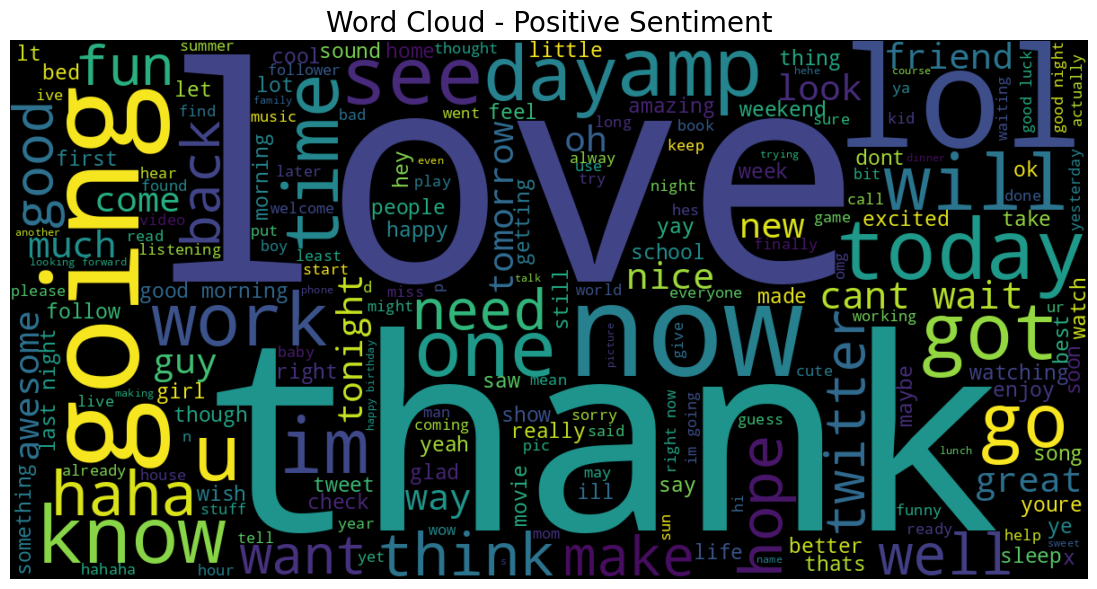

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positive_texts = df[df['sentiment'] == 'positive']['clean_text']
positive_words = " ".join(positive_texts)
wordcloud = WordCloud(width=1200, height=600, background_color='black').generate(positive_words)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Sentiment", fontsize=20)
plt.show()

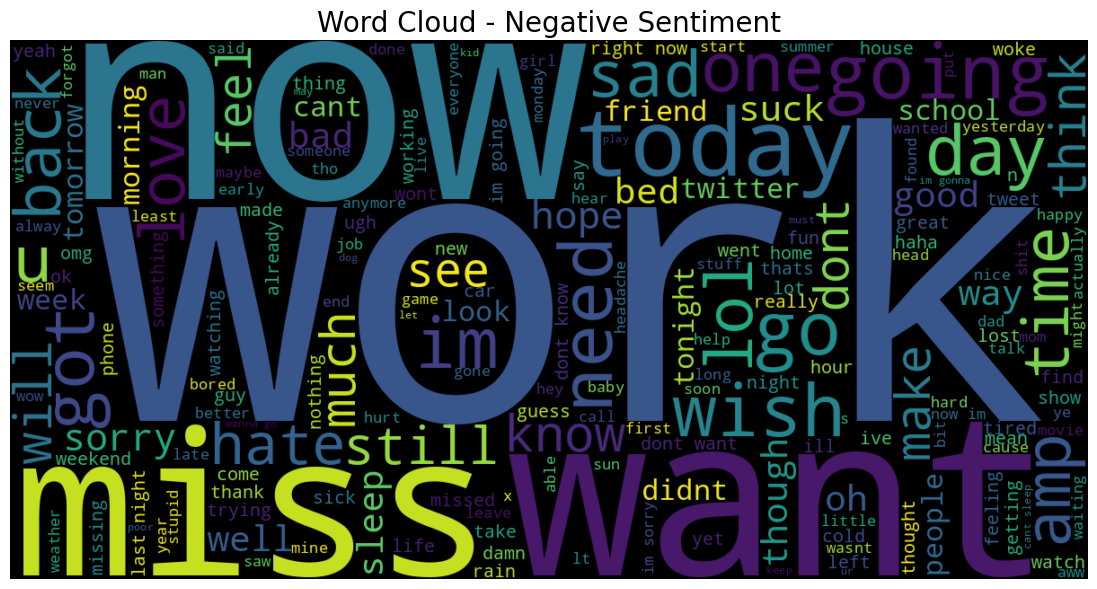

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
negative_texts = df[df['sentiment'] == 'negative']['clean_text']
negative_words = " ".join(negative_texts)
wordcloud_neg = WordCloud(width=1200, height=600, background_color='black').generate(negative_words)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Sentiment", fontsize=20)
plt.show()

<Axes: ylabel='count'>

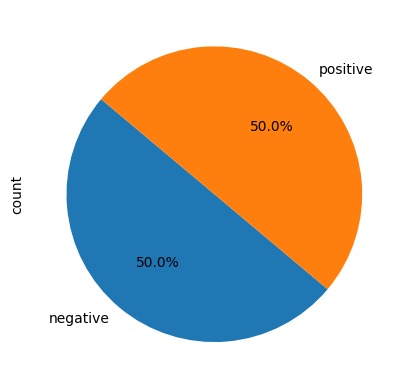

In [20]:
df['sentiment'].value_counts().plot(kind= 'pie', autopct='%1.1f%%', startangle=140 )


/tmp/ipython-input-3282396534.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], errors='coerce') # Convert 'date' column to datetime


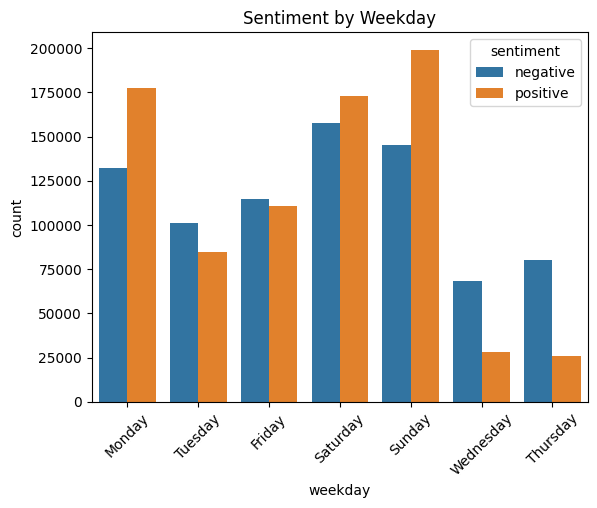

In [21]:
df['date'] = pd.to_datetime(df['date'], errors='coerce') # Convert 'date' column to datetime
df['weekday'] = df['date'].dt.day_name()
sns.countplot(data=df, x='weekday', hue='sentiment')
plt.xticks(rotation=45); plt.title("Sentiment by Weekday"); plt.show()

<Figure size 1000x500 with 0 Axes>

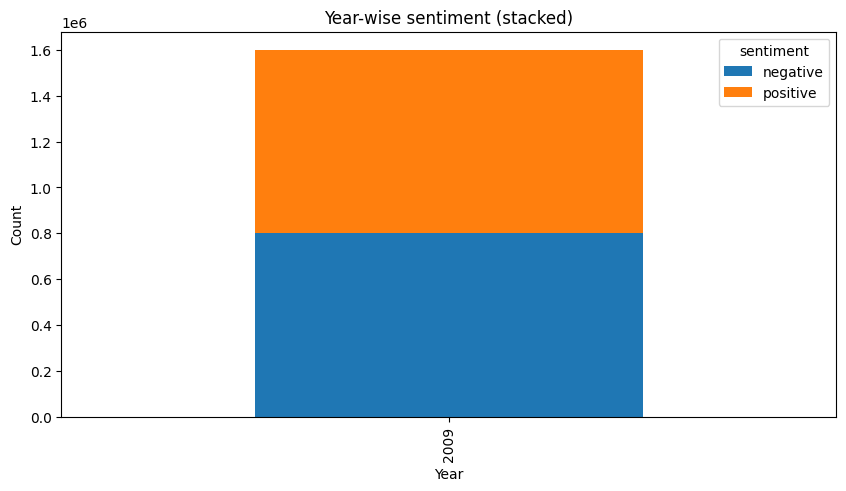

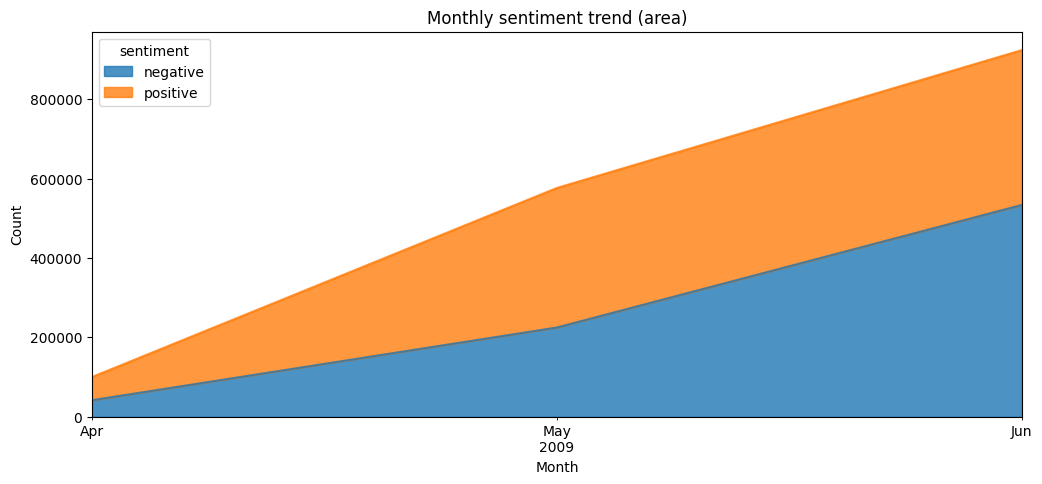

In [24]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
twitter_sentiments = df.dropna(subset=['date']).copy()
sent_year = twitter_sentiments.groupby([twitter_sentiments['date'].dt.year, 'sentiment']).size().unstack(fill_value=0)
years = np.arange(sent_year.index.min(), sent_year.index.max()+1)
sent_year = sent_year.reindex(years, fill_value=0)
plt.figure(figsize=(10,5))
sent_year.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Year-wise sentiment (stacked)")
plt.xlabel("Year"); plt.ylabel("Count")
plt.show()
twitter_sentiments.set_index('date', inplace=True)
monthly = twitter_sentiments.groupby('sentiment').resample('M').size().unstack(0).fillna(0)
monthly.index = monthly.index.to_period('M').to_timestamp()
monthly.plot(kind='area', figsize=(12,5), alpha=0.8)
plt.title("Monthly sentiment trend (area)")
plt.xlabel("Month"); plt.ylabel("Count")
plt.show()

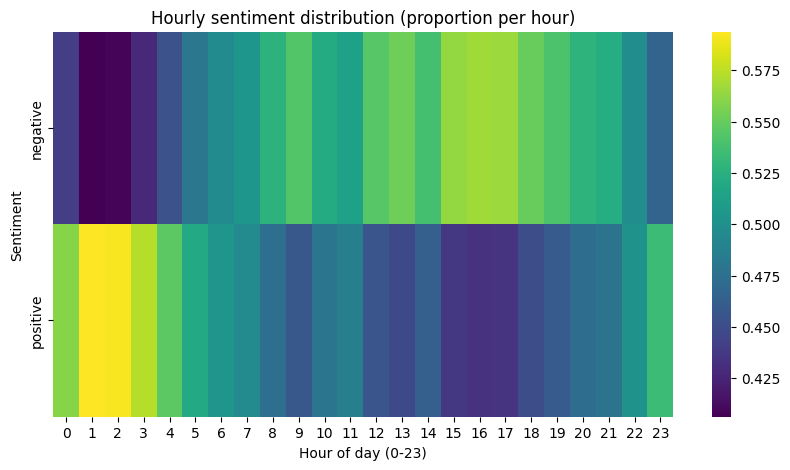

In [25]:
df['hour'] = df['date'].dt.hour
hour_sent = df.groupby(['hour','sentiment']).size().unstack(fill_value=0)
hour_pct = hour_sent.div(hour_sent.sum(axis=1), axis=0)
plt.figure(figsize=(10,5))
sns.heatmap(hour_pct.T, annot=False, cmap='viridis')
plt.title("Hourly sentiment distribution (proportion per hour)")
plt.xlabel("Hour of day (0-23)"); plt.ylabel("Sentiment")
plt.show()

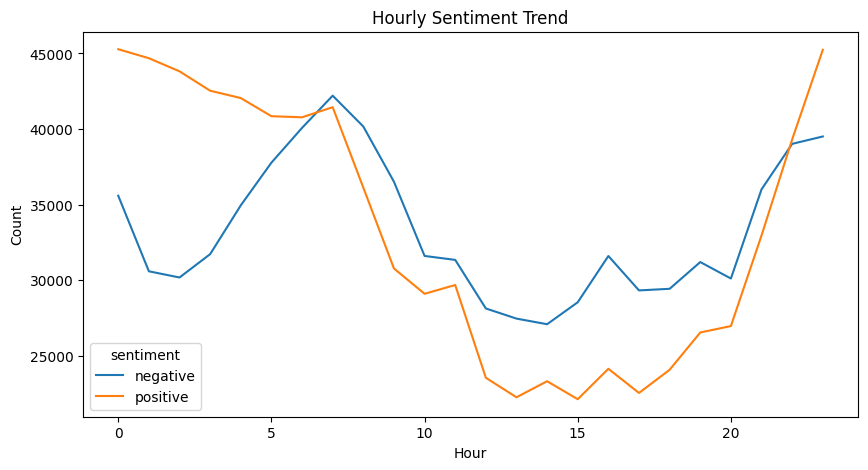

In [26]:
hourly = df.groupby([twitter_sentiments.index.hour, 'sentiment']).size().unstack()
hourly.plot(figsize=(10,5))
plt.title("Hourly Sentiment Trend"); plt.xlabel("Hour"); plt.ylabel("Count")
plt.show()

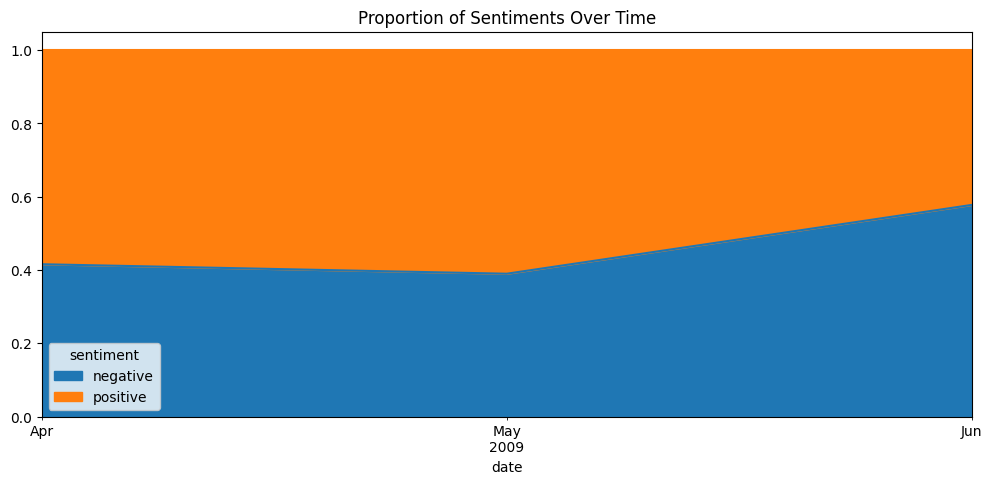

In [27]:
monthly_pct = monthly.div(monthly.sum(axis=1), axis=0)
monthly_pct.plot(kind='area', figsize=(12,5))
plt.title("Proportion of Sentiments Over Time")
plt.show()

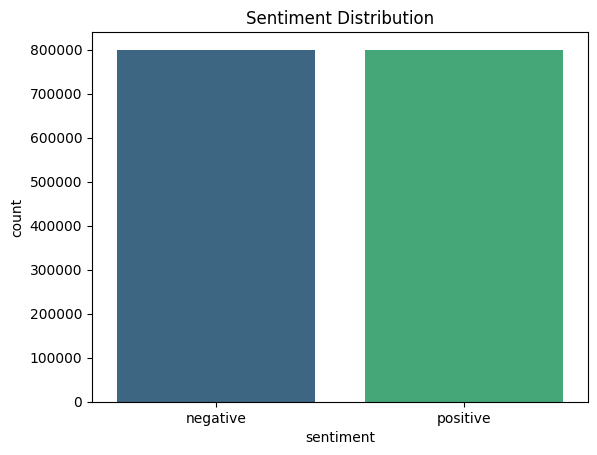

In [18]:
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='viridis', legend=False);
plt.title("Sentiment Distribution")
plt.show()

In [19]:
from collections import Counter
words = " ".join(df['clean_text']).split()
Counter(words).most_common(20)

[('i', 751303),
 ('to', 564589),
 ('the', 520090),
 ('a', 377999),
 ('my', 314118),
 ('and', 298467),
 ('you', 270155),
 ('is', 236032),
 ('it', 230925),
 ('for', 215726),
 ('in', 214386),
 ('of', 183445),
 ('im', 178401),
 ('on', 167123),
 ('me', 160209),
 ('so', 150835),
 ('have', 144551),
 ('that', 141355),
 ('but', 127526),
 ('just', 125069)]